<a href="https://colab.research.google.com/github/schase15/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/Steven_Chase_LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



# Part 1

In [0]:
# True positive rate
true_positive_rate = 1

# False positive rate
false_positive_rate = 0.08

# Prior belief
prob_drunk_prior = 1/1000

def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):
  prob_not_drunk_driver = 1- prob_drunk_prior
  posterior_probability = (true_positive_rate* prob_drunk_prior) / ((true_positive_rate* prob_drunk_prior) + (false_positive_rate* prob_not_drunk_driver))
  return posterior_probability


In [3]:
# Probability that the person is drunk after 1 positive breathalyzer
prob_drunk_given_positive(0.001, 0.08, 1)

0.012357884330202669

In [4]:
# Probability that the person is drunk after 2 positive breathalyzer
prob_drunk_given_positive(0.012357884330202669, 0.08, 1)

0.13525210993291495

In [5]:
# Probability that the person is drunk after 3 positive breathalyzer
prob_drunk_given_positive(0.13525210993291495, 0.08, 1)

0.6615996951348605

In [6]:
# Probability that the person is drunk after 4 positive breathalyzer
prob_drunk_given_positive(0.6615996951348605, 0.08, 1)

0.9606895076105054

In [0]:
# Want to write a funciton that iterates my function above

It takes 4 positive breathalyzer tests to have a probability higher than 95% that the person is a drunk driver. 

# Part 2

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [10]:
# Import and clean a dataset from this week to work with
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-03-18 20:58:10--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.1s    

2020-03-18 20:58:11 (135 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
# Import data

df = pd.read_csv('house-votes-84.data', names= ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])

# Encode and replace to clean data

df = df.replace({'n':0, 'y': 1, '?': np.NaN})

# Drop np.NaN values, to use confidence interval function later on
df = df.dropna()

# Split dataset into Democrat and Republican

dem= df[df['party'] == 'democrat']
rep= df[df['party'] == 'republican']

In [0]:
# Functions I wrote last week to visualize Confidence Intervals

def confidence_interval(data, confidence_level = 0.95):

# Variables
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  s = data.std(ddof= 1)

# Standard error
  std_error = s / np.sqrt(n)

# t-stat
  t = stats.t.ppf((1 + confidence_level) / 2.0, n-1)

# Margin of error
  margin_of_error = t*std_error

# Upper
  upper = mean + margin_of_error

# Lower
  lower = mean - margin_of_error

  return (mean, margin_of_error, lower, upper)

In [0]:
def graph_CI (data, title):
  data.plot.density()
  plt.title(title)
  plt.axvline(x=mean, color= 'black')
  plt.axvline(x=upper, color= 'red')
  plt.axvline(x=lower, color= 'red')
 
  return(plt.show())

In [0]:
# Look at the difference between Bayesian approach and a frequentist approach
# Using dem['budget']
# Manipulate the sample size to see the difference which is more apparent at a smaller sample size

In [24]:
mean, margin_of_error, lower, upper = confidence_interval(dem['budget'])
print(mean)
print(lower)
print(upper)

0.8548387096774194
0.791966749899413
0.9177106694554258


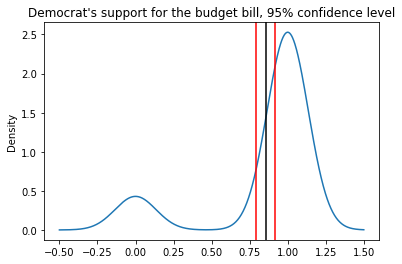

In [25]:
graph_CI(dem['budget'], "Democrat's support for the budget bill, 95% confidence level")

In [26]:
# Bayesian approach using stats.bayes_mvs

mean_CI, _, _ = stats.bayes_mvs(dem['budget'], alpha= 0.95)
mean_CI


Mean(statistic=0.8548387096774194, minmax=(0.791966749899413, 0.9177106694554258))

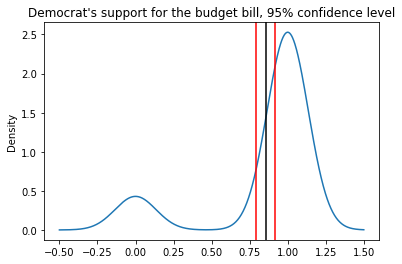

In [29]:
dem['budget'].plot.density()
plt.title("Democrat's support for the budget bill, 95% confidence level")
plt.axvline(x=0.8548387096774194, color= 'black')
plt.axvline(x=0.791966749899413, color= 'red')
plt.axvline(x=0.9177106694554258, color= 'red')

plt.show()

Looking at these two graphs, and the associated means and upper/lower bounds, they are the same. This is because the sample size is so large.

In the below example I do the same process as above, with a smaller sample size

In [63]:
sample_dem_budget = dem['budget'][0:30]
sample_dem_budget

5      1.0
19     1.0
23     1.0
25     1.0
26     1.0
27     1.0
29     1.0
32     1.0
34     1.0
39     1.0
42     1.0
43     1.0
46     1.0
48     1.0
50     1.0
63     1.0
69     1.0
74     1.0
75     1.0
77     1.0
78     1.0
85     1.0
88     1.0
90     1.0
91     1.0
93     1.0
94     1.0
97     0.0
98     1.0
100    0.0
Name: budget, dtype: float64

In [64]:
# Frequentist CI
mean, margin_of_error, lower, upper = confidence_interval(sample_dem_budget)
print(mean)
print(lower)
print(upper)

0.9333333333333333
0.8385971600102017
1.0280695066564651


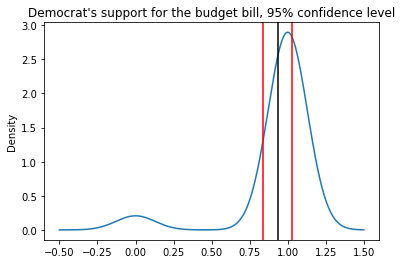

In [65]:
graph_CI(sample_dem_budget, "Democrat's support for the budget bill, 95% confidence level")

In [66]:
# # Bayesian approach using stats.bayes_mvs

mean_CI, _, _ = stats.bayes_mvs(sample_dem_budget, alpha= 0.95)
mean_CI


Mean(statistic=0.9333333333333333, minmax=(0.8385971600102017, 1.0280695066564651))

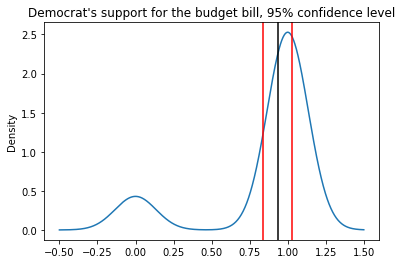

In [67]:
dem['budget'].plot.density()
plt.title("Democrat's support for the budget bill, 95% confidence level")
plt.axvline(x=0.9333333333333333, color= 'black')
plt.axvline(x=0.8385971600102017, color= 'red')
plt.axvline(x=1.0280695066564651, color= 'red')

plt.show()

# Part 3

Bayesian statistics starts with a prior belief of what the probability for the population is. As new information is obtained, this probability is updated. This tightens the probability distribution and gets closer to the actual true value. As more 'samples' are introduced, the believed probability (prior probability in the begining and then posterior probability) is continually updated. 

Freuqentist statistics uses the number of occurances to estimate values from a sample to the population. It works solely with samples and extrapolates values drawn from the sample to the population. With Bayesian statistics, it is estimating probabilities for the whole population and updating as it gets in new information. 


## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!